# Project 2 | Unsupervised Learning |  Classify a given silhouette as one of three types of vehicle

The purpose of the case study is to classify a given silhouette as one of four different types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
Four &quot;Corgie&quot; model vehicles were used for the experiment: a double decker bus, Cheverolet
van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

In [1]:
#Import all the necessary modules

# Import Basic Libraries
import numpy as np
import pandas as pd
import os

# Import Datavisualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set Theme for Data Visualization
%matplotlib inline
sns.set_style('whitegrid')

# Mitigating Warnings
import warnings
warnings.filterwarnings('ignore')

# Import Libraries for Statistical Analysis
import scipy.stats as stats

# Import Library for Principal Component Analysis
from sklearn.decomposition import PCA

# Import Libraries for Classification Model Building
from sklearn.svm import SVC #Support Vector Classifier

# Identification of Optimum vales for Hyperparameters for Model Tuning
from sklearn.model_selection import GridSearchCV

# Set Options for Tabular Output
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

# Import Libraries for Train-Test split, Scaling,Label encoder and Metric calculation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
# Import Dataset
cars = pd.read_csv("vehicle.csv")
cars.head()

compactness  circularity  distance_circularity  radius_ratio  \
0  95           48.0         83.0                  178.0          
1  91           41.0         84.0                  141.0          
2  104          50.0         106.0                 209.0          
3  93           41.0         82.0                  159.0          
4  85           44.0         70.0                  205.0          

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0  72.0                  10                       162.0           
1  57.0                  9                        149.0           
2  66.0                  10                       207.0           
3  63.0                  9                        144.0           
4  103.0                 52                       149.0           

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0  42.0           20.0                    159                         
1  45.0           19.0                    143                         
2  32.0           23.0                    158                         
3  46.0           19.0                    143                         
4  45.0           19.0                    144                         

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0  176.0            379.0              184.0                       
1  170.0            330.0              158.0                       
2  223.0            635.0              220.0                       
3  160.0            309.0              127.0                       
4  241.0            325.0              188.0                       

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0  70.0                         6.0             16.0               
1  72.0                         9.0             14.0               
2  73.0                         14.0            9.0                
3  63.0                         6.0             10.0               
4  127.0                        9.0             11.0               

   skewness_about.2  hollows_ratio class  
0  187.0             197            van   
1  189.0             199            van   
2  188.0             196            car   
3  199.0             207            van   
4  180.0             183            bus

  ## #1 Data pre-processing - Understand the data and treat missing values

In [3]:
# 1 Cleaning any leading/trailing whitespace in the column header
cars.columns = [x.strip() for x in cars.columns]
cars.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

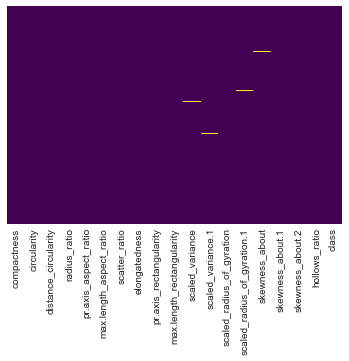

In [4]:
# 2 Missing Value Treatment

# 2.1 Identification of missing values through data vicualization
sns.heatmap(cars.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
# 2.2 Identification of columns containing missing values
print("Column Names: \n",pd.DataFrame(cars.isna().any()))

Column Names: 
                                  0
compactness                  False
circularity                  True 
distance_circularity         True 
radius_ratio                 True 
pr.axis_aspect_ratio         True 
max.length_aspect_ratio      False
scatter_ratio                True 
elongatedness                True 
pr.axis_rectangularity       True 
max.length_rectangularity    False
scaled_variance              True 
scaled_variance.1            True 
scaled_radius_of_gyration    True 
scaled_radius_of_gyration.1  True 
skewness_about               True 
skewness_about.1             True 
skewness_about.2             True 
hollows_ratio                False
class                        False


We can see that missing values present in 19 Columns

In [6]:
# 2.3 Imputing Missing values with median

# Creating a Deep Copy of original Dataset

cars1 = cars.copy(deep = True)

# Imputing process 
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN', strategy='median', axis=0)
imputer = imputer.fit(cars1.iloc[:,:-1])
imputed_data = imputer.transform(cars1.iloc[:,:-1].values)
cars1.iloc[:,:-1] = imputed_data

C:\Users\hi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


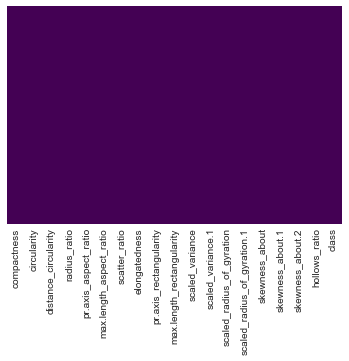

In [7]:
# 2.4 Rechecking Missing Values
sns.heatmap(cars1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
# 3 Read the column description and ensure you understand each attribute well
cars1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null float64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null float64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null float64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_rat

Insight: Here we can see that only "Class" of vehicle does have Object datatype, the rest attributes are float in nature. We need to Label Encode "Class" for future use. Note that "Class" can be used as Target variable.

In [9]:
# 3.1 Label Encoding "Class"

labelencoder = LabelEncoder()
cars1['class'] = labelencoder.fit_transform(cars1['class'])
cars1.groupby(["class"]).count()

compactness  circularity  distance_circularity  radius_ratio  \
class                                                                 
0      218          218          218                   218            
1      429          429          429                   429            
2      199          199          199                   199            

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
class                                                                 
0      218                   218                      218             
1      429                   429                      429             
2      199                   199                      199             

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
class                                                                     
0      218            218                     218                         
1      429            429                     429                         
2      199            199                     199                         

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
class                                                                  
0      218              218                218                         
1      429              429                429                         
2      199              199                199                         

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
class                                                                  
0      218                          218             218                
1      429                          429             429                
2      199                          199             199                

       skewness_about.2  hollows_ratio  
class                                   
0      218               218            
1      429               429            
2      199               199

In [10]:
# 4 Now understanding the numeric attributes through describe function
round(cars1.describe().transpose(),2)

count    mean     std    min     25%    50%  \
compactness                  846.0  93.68   8.23    73.0   87.00   93.0    
circularity                  846.0  44.82   6.13    33.0   40.00   44.0    
distance_circularity         846.0  82.10   15.74   40.0   70.00   80.0    
radius_ratio                 846.0  168.87  33.40   104.0  141.00  167.0   
pr.axis_aspect_ratio         846.0  61.68   7.88    47.0   57.00   61.0    
max.length_aspect_ratio      846.0  8.57    4.60    2.0    7.00    8.0     
scatter_ratio                846.0  168.89  33.20   112.0  147.00  157.0   
elongatedness                846.0  40.94   7.81    26.0   33.00   43.0    
pr.axis_rectangularity       846.0  20.58   2.59    17.0   19.00   20.0    
max.length_rectangularity    846.0  148.00  14.52   118.0  137.00  146.0   
scaled_variance              846.0  188.60  31.36   130.0  167.00  179.0   
scaled_variance.1            846.0  439.31  176.50  184.0  318.25  363.5   
scaled_radius_of_gyration    846.0  174.71  32.55   109.0  149.00  173.5   
scaled_radius_of_gyration.1  846.0  72.44   7.47    59.0   67.00   71.5    
skewness_about               846.0  6.36    4.90    0.0    2.00    6.0     
skewness_about.1             846.0  12.60   8.93    0.0    5.00    11.0    
skewness_about.2             846.0  188.92  6.15    176.0  184.00  188.0   
hollows_ratio                846.0  195.63  7.44    181.0  190.25  197.0   
class                        846.0  0.98    0.70    0.0    0.00    1.0     

                                75%     max  
compactness                  100.00  119.0   
circularity                  49.00   59.0    
distance_circularity         98.00   112.0   
radius_ratio                 195.00  333.0   
pr.axis_aspect_ratio         65.00   138.0   
max.length_aspect_ratio      10.00   55.0    
scatter_ratio                198.00  265.0   
elongatedness                46.00   61.0    
pr.axis_rectangularity       23.00   29.0    
max.length_rectangularity    159.00  188.0   
scaled_variance              217.00  320.0   
scaled_variance.1            586.75  1018.0  
scaled_radius_of_gyration    198.00  268.0   
scaled_radius_of_gyration.1  75.00   135.0   
skewness_about               9.00    22.0    
skewness_about.1             19.00   41.0    
skewness_about.2             193.00  206.0   
hollows_ratio                201.00  211.0   
class                        1.00    2.0

Insight: After looking at numeric attributes we can see that they are in different scale, for PCA we need to perform scale transformation.

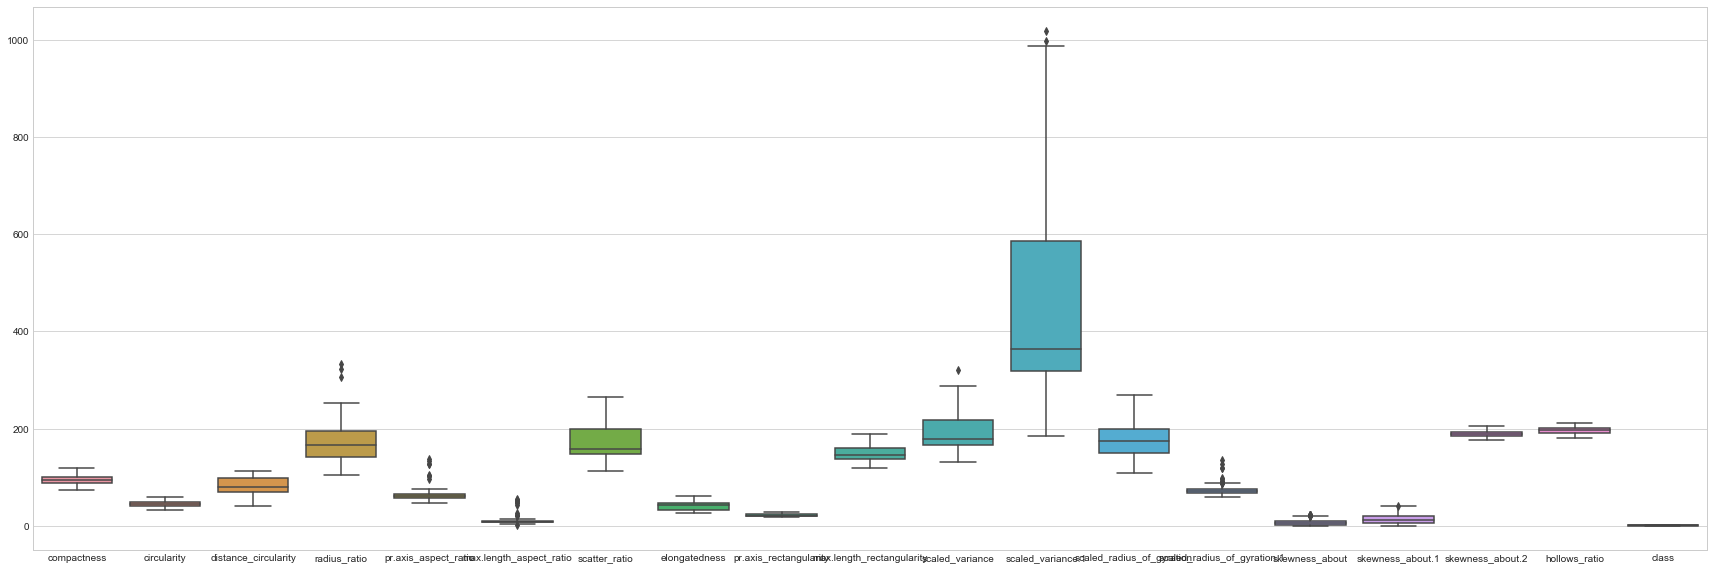

In [11]:
# 5 Outlier Analysis and Treatment

# 5.1 BOXPLOT to see if there are any outliers in the attributes given in dataset
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
sns.boxplot(data = cars1)

Insights: Through BoxPlot we can see presence of Outliers in the dataset

In [12]:
# 5.2 Calculation of first quantile (Q1), Third Quantile (Q3), and Inter Quantile Range
Q1 = cars1.quantile(0.25)
Q3 = cars1.quantile(0.75)
IQR = Q3 - Q1
l_bound = Q1 - (1.5*IQR)
u_bound = Q3 + (1.5*IQR)
print("IQR for attributes in dataset:\n", round(IQR,2))

IQR for attributes in dataset:
 compactness                    13.00 
circularity                    9.00  
distance_circularity           28.00 
radius_ratio                   54.00 
pr.axis_aspect_ratio           8.00  
max.length_aspect_ratio        3.00  
scatter_ratio                  51.00 
elongatedness                  13.00 
pr.axis_rectangularity         4.00  
max.length_rectangularity      22.00 
scaled_variance                50.00 
scaled_variance.1              268.50
scaled_radius_of_gyration      49.00 
scaled_radius_of_gyration.1    8.00  
skewness_about                 7.00  
skewness_about.1               14.00 
skewness_about.2               9.00  
hollows_ratio                  10.75 
class                          1.00  
dtype: float64


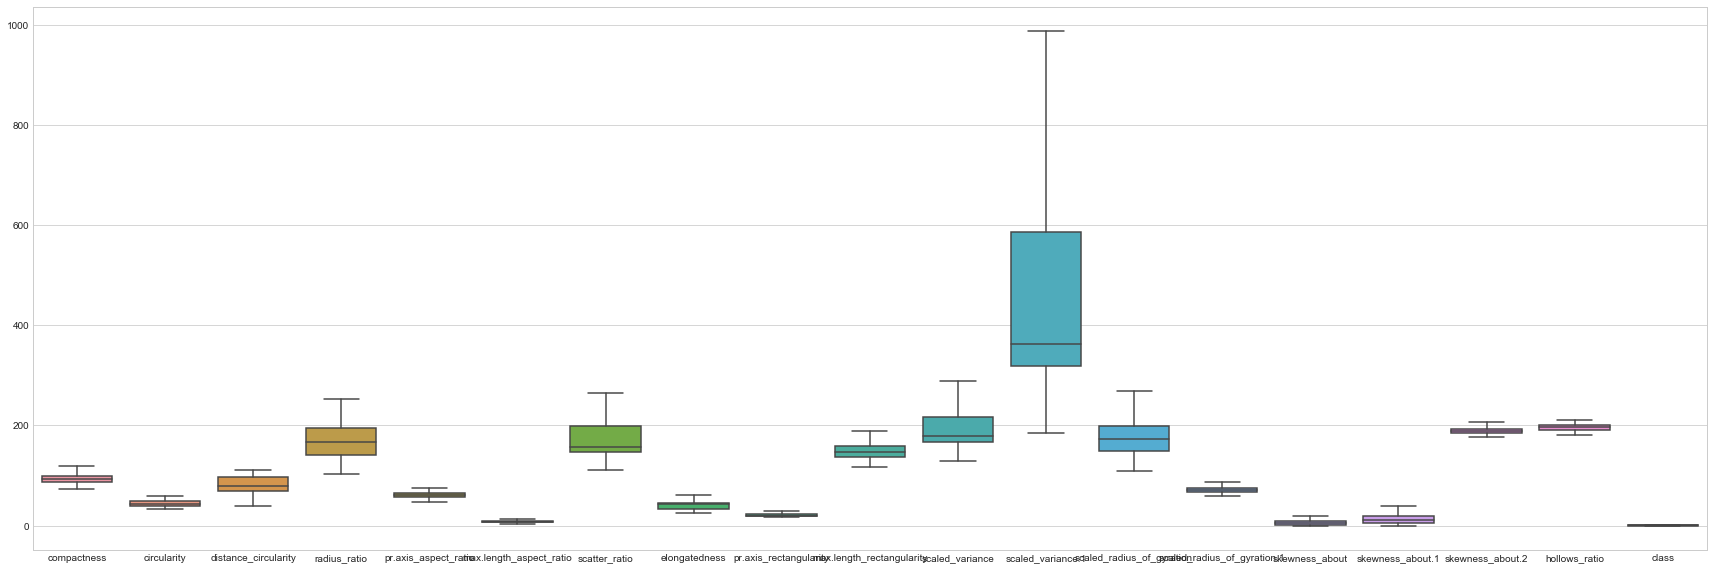

In [13]:
# 5.3 Creating a new Workbook and keeping the original dataset for reference purpose
wb = cars1.copy(deep = True)

# 5.4 Converting the outliers into nan and then imputing nan with max value
wb[(wb < l_bound) | (wb > u_bound)] = np.nan
wb = wb.fillna(wb.max()).astype(float)

# 5.5 BOXPLOT to see if there are any outliers in the attributes given in dataset
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
sns.boxplot(data = wb)

## #2 Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why

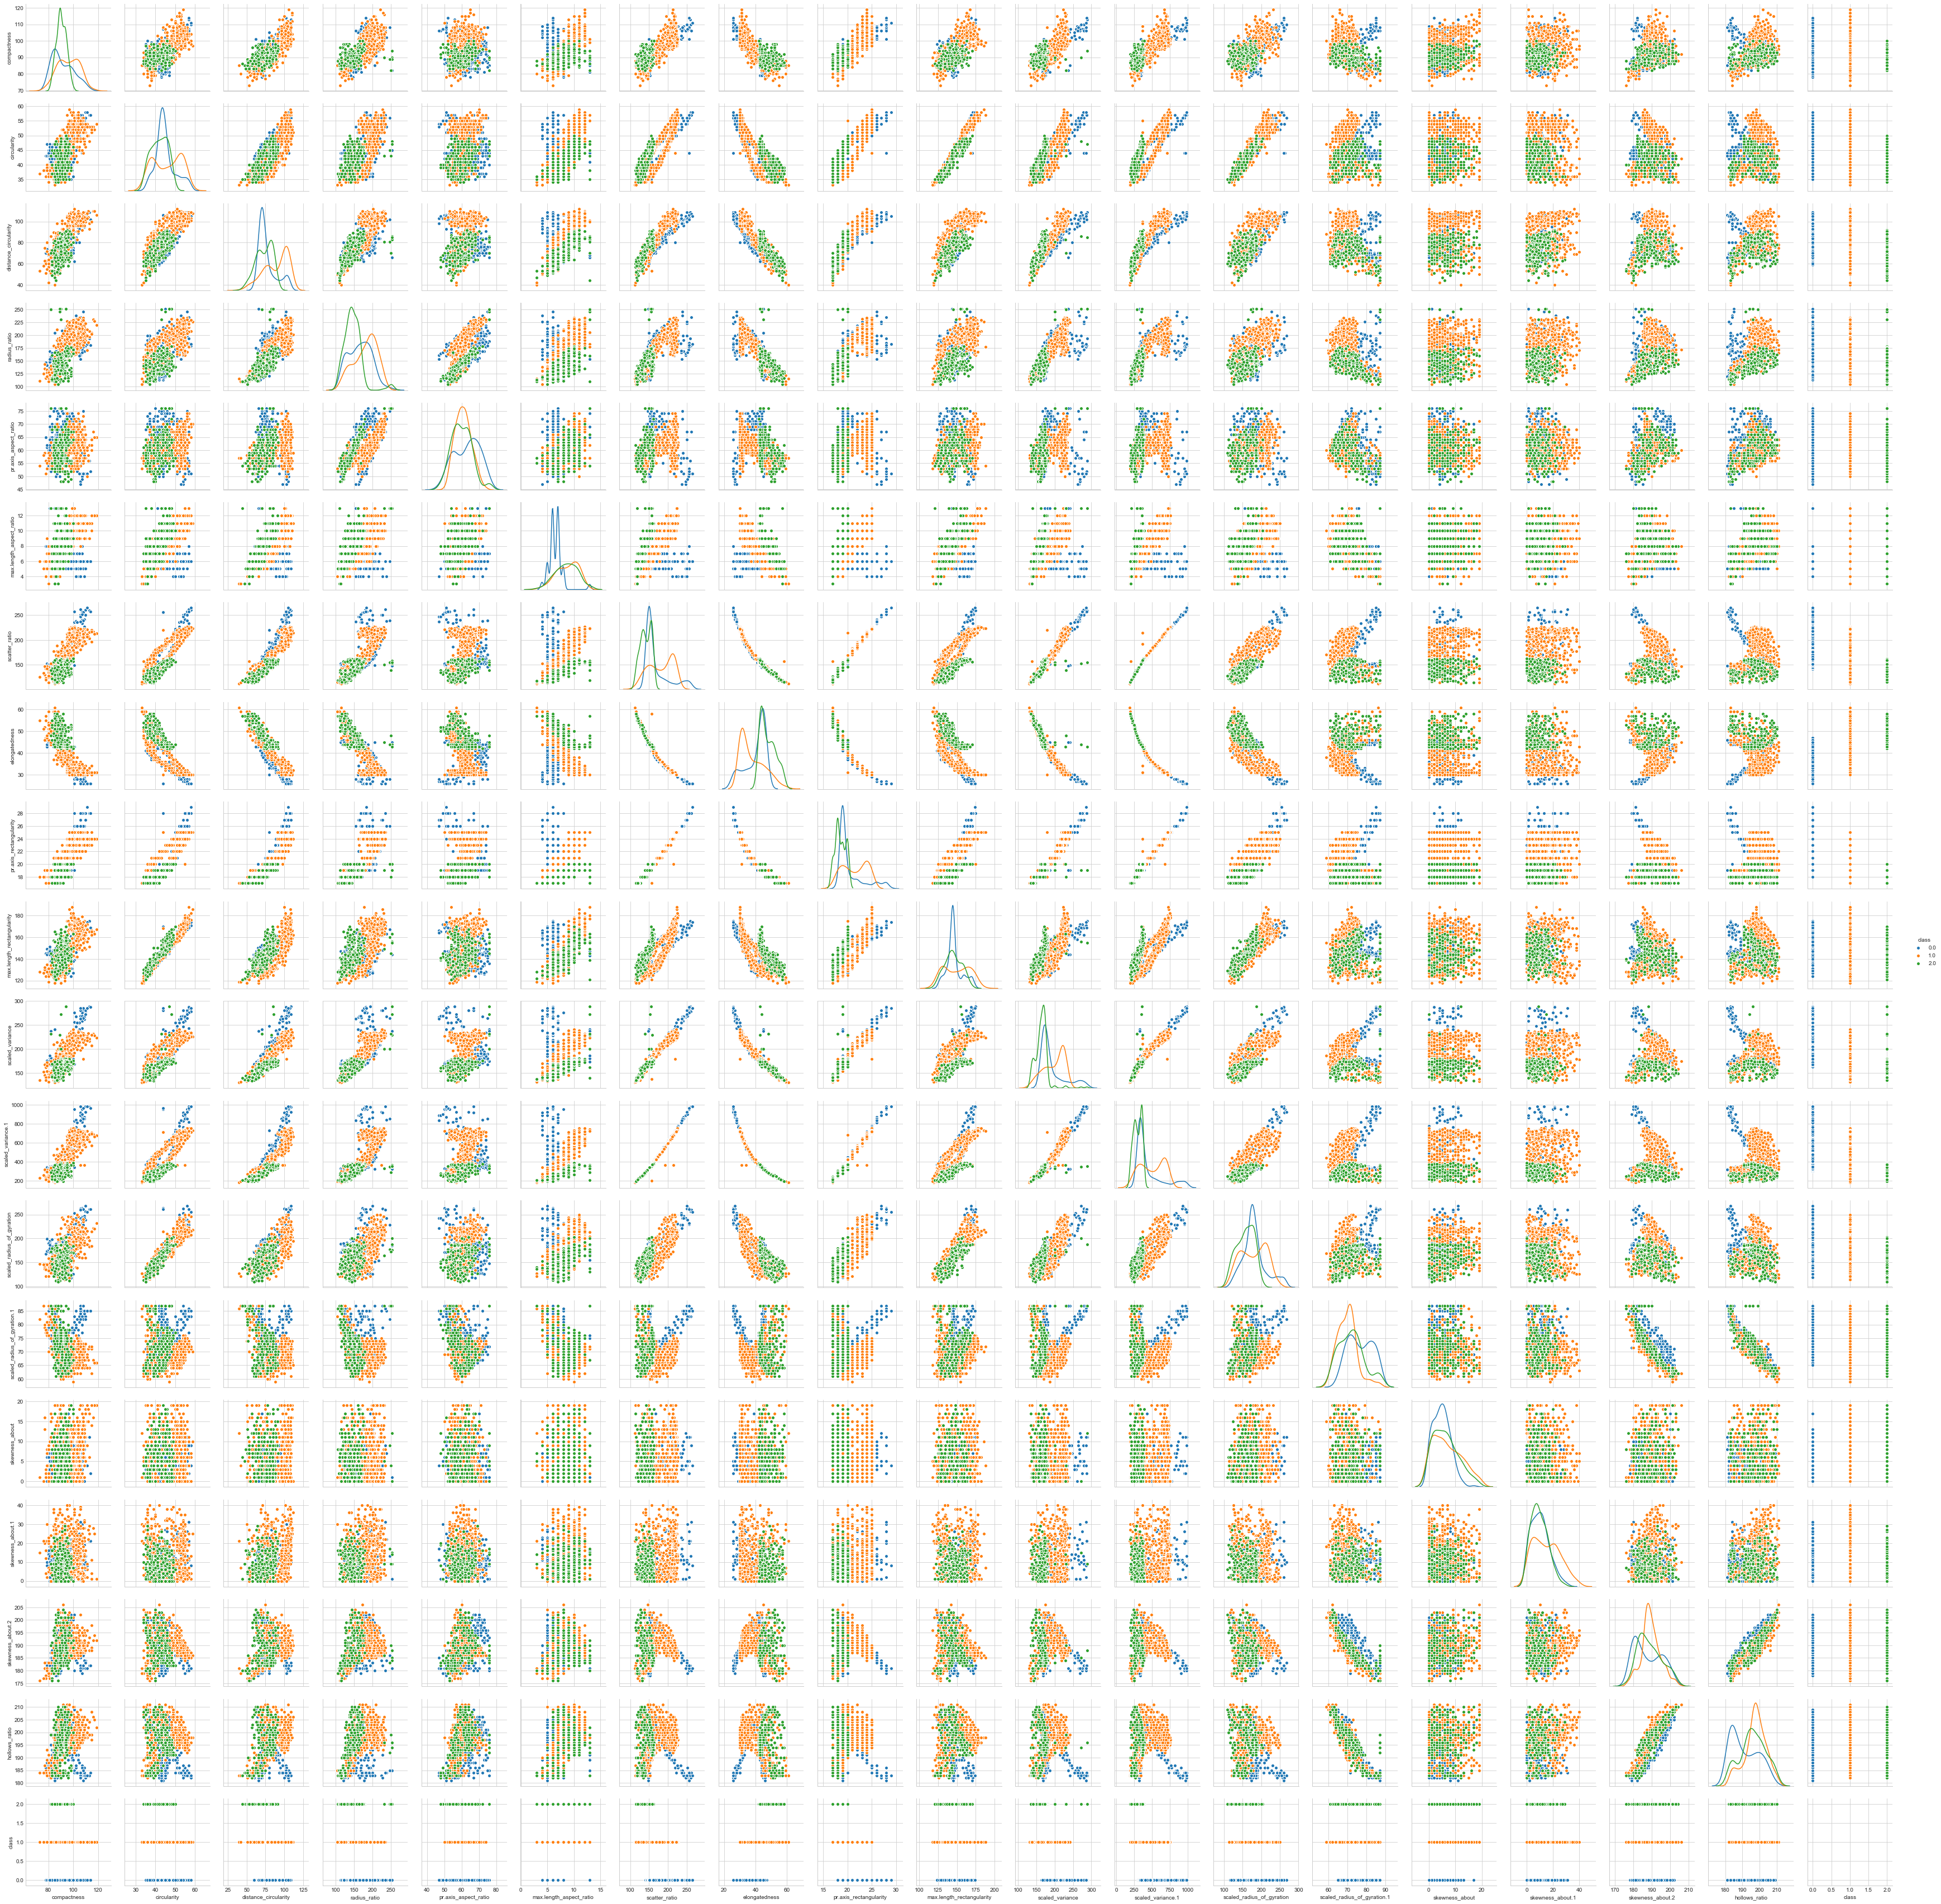

In [14]:
# Bi-Variate Analysis 1: Pairplot to understand the relationship between attributes
sns.pairplot(wb,hue='class', diag_kind = 'kde')

Insights: Through Pairplot we can clearly see mix of gassian mix in individial attributes suggesting data coming from multiple processes. In this case we case see presence of atleast 3 clusters in the dataset. Going to perform correlation analysis to foresee presence of collinearity between the attributes

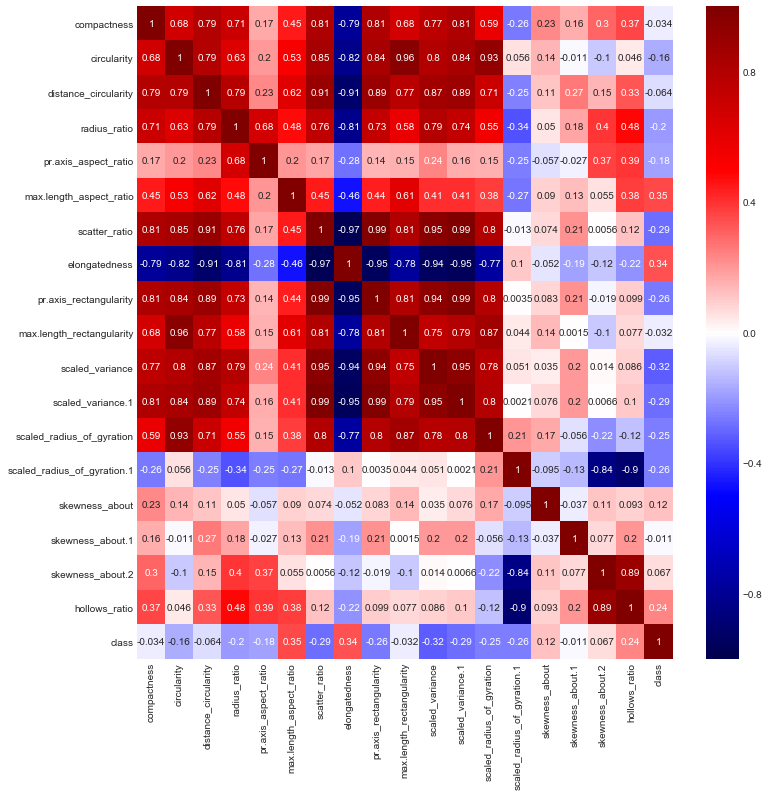

In [15]:
# Bi - Variate Analysis 2: Check for correlation between attributes

fig, ax = plt.subplots()
fig.set_size_inches(12,12)
sns.heatmap(wb.corr(),annot=True,vmin=-1,vmax=1,cmap='seismic')

Compactness has direct relationship with circularity and distance circularity, radius ratio, scatter ratio, pr_axis rectangularity
Compactness, circularity, distance_circulatiry, elangatedness and scatter ration, appears to be normally distributed
There is a Negative correlation between Elongatedness and almost every attribute including compactness, circularity radius_ratio,scaled variance etc.,
There is no golden rule to remove attributes from dataset based on correlation, one school of thought says there should be moderate correlation between attributes and another suggests strong. For this analysis I'm planning to keep all attributes and then perform PCA

## #3  Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance)

In [16]:
wb.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [17]:
# Define features
X = wb[['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio']]

# Define categorical outcome 
Y = wb[['class']]

# Standardize feature space to have mean 0 and variance 1
X_SD = StandardScaler().fit_transform(X)

X_SD.shape

(846, 18)

In [18]:
# Step 1 - Create Covariance Matrix
cov_matrix = np.cov(X_SD.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00118343  0.68569786  0.79086299  0.71125432  0.16901957  0.45187703
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76633869  0.81512097
   0.58593517 -0.26406291  0.23320056  0.15721202  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.63531573  0.19883769  0.53039448
   0.8489411  -0.82244387  0.84439802  0.96245572  0.80038469  0.83707855
   0.92691166  0.05654873  0.14470995 -0.01139577 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.78732015  0.23019486  0.61874018
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86617461  0.88744508
   0.70660663 -0.24801881  0.11320131  0.26581165  0.14627113  0.33312625]
 [ 0.71125432  0.63531573  0.78732015  1.00118343  0.67901073  0.48293911
   0.75799002 -0.81379546  0.73177966  0.57972665  0.7951814   0.74263858
   0.54863568 -0.3369482   0.05030021  0.1788668   0.39663962  0.48534139]
 [ 0.16901957  0.19883769  0.23019486  0.67901073  1.00118343  0.20479412
   0.1750348

In [19]:
# Step 2: Obtain eigenvectors and eigenvalues
e_vals, e_vecs = np.linalg.eig(cov_matrix)
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[-2.72657458e-01 -9.26187238e-02 -1.86795902e-01  2.49838086e-02
  -1.61576714e-01  1.48512553e-01 -2.97276942e-01 -7.31294345e-01
   3.45634959e-01  2.31879208e-01  3.10426723e-02  1.11155248e-01
  -1.00732041e-01  1.09699695e-02 -8.23834457e-02 -8.10495085e-02
   7.79204462e-03 -2.94772036e-04]
 [-2.88318563e-01  1.29355524e-01  2.41933454e-02  2.04819752e-01
   1.22430324e-01  2.55339349e-02  3.99951036e-01 -1.05001582e-01
   5.54817002e-02 -7.30439508e-02  7.66328694e-02 -2.53201861e-01
  -8.12698693e-02  1.01649644e-02 -2.52619521e-01  2.45932453e-01
   6.73271824e-01  9.09719657e-02]
 [-3.02532137e-01 -5.11161370e-02 -8.81993619e-02 -7.69678486e-02
   1.01665099e-01  1.25148084e-02 -9.69250499e-02  3.38723244e-01
   2.35966939e-01  1.46278800e-01  7.42700816e-01  2.64841233e-01
   1.24728036e-01 -8.66039442e-03  1.40911971e-01  1.50532113e-01
   2.34244226e-02 -4.21910099e-03]
 [-2.68740764e-01 -1.95097565e-01  2.82039278e-01 -2.55279922e-02
  -1.13889510e-01 -2.00

In [20]:
# Find variance and cumulative variance by each eigen vector

tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 53.83675357  72.18844973  78.82948063  85.30581937  90.17446619
  94.23558982  96.13725778  97.36528778  98.09652786  98.6232033
  98.98008194  99.29437872  99.52106642  99.69156674  99.81767675
  99.92717087  99.98353261 100.        ]


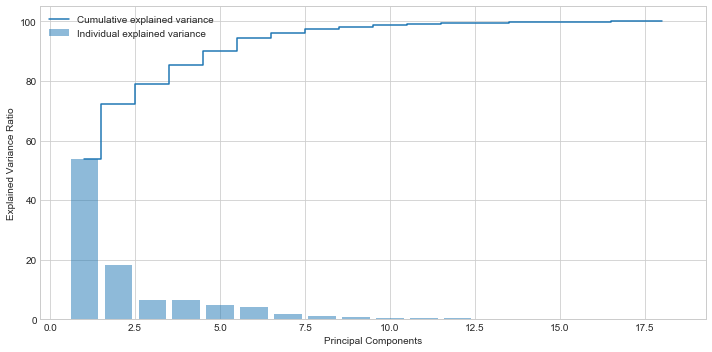

In [21]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

The plot shows that the first principal component alone accounts for 53.83% percent of the variance. Also, we can see that the first seven principal components combined explain almost 96.13% percent of the variance in the data.

In [22]:
# Using PCA command from sklearn and find Principal Components. Transform data to components formed
pca = PCA(n_components=10) #Considering 7 Components explaining 98.62% variance in Data
principalComponents = pca.fit_transform(X_SD)
pcdf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])

pcdf.head(10)

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.542874 -0.623676 -0.543445  1.017488 -1.028666  1.293751 -0.513752   
1 -1.528201 -0.383076 -0.186030 -1.126552 -0.586291  0.103951  0.189132   
2  3.881712  0.196724 -1.173071 -0.236912  0.588637  0.894426  0.657492   
3 -1.570360 -3.009696 -0.395423 -0.228582 -0.536193 -0.556769  0.141084   
4 -0.075972  1.838413 -0.870756  2.430752 -1.082974  3.438199  1.595262   
5  5.408570  4.520194  1.253928 -0.786617  2.057565 -1.801704  0.734927   
6 -0.817727 -2.235533 -1.859706 -0.072326  1.653866 -0.336898 -0.286821   
7 -1.989822 -1.496719 -1.094722  0.968377 -0.886038 -0.562233 -0.337794   
8 -4.400311 -3.242962  0.592967  0.042258 -0.227098 -0.788492 -0.211847   
9  1.173014 -1.943219  0.544796 -0.228640 -0.977353 -0.635301  0.622128   

        PC8       PC9      PC10  
0 -0.547036 -0.700378 -0.177476  
1  0.152131  0.191021  0.072058  
2  0.308659 -0.221089  0.413680  
3 -0.151790  0.047745 -0.484097  
4 -0.060906  1.256338  0.961256  
5  0.388184  0.523388  0.469052  
6 -0.198314  0.209961  0.044792  
7 -0.379732  0.065614  0.085089  
8 -0.281405  0.372399 -0.219843  
9  0.796617  0.234696 -0.438810

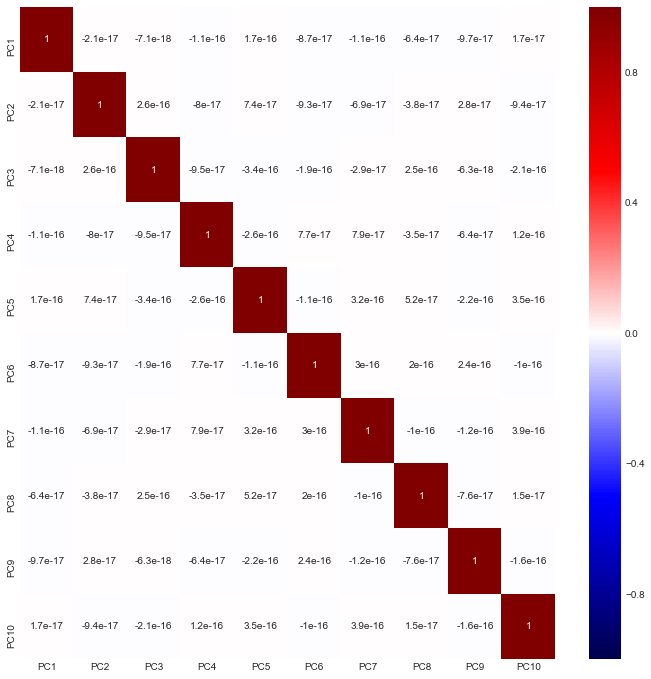

In [23]:
# Bi - Variate Analysis between Principle Components: Check for correlation between Principle components

fig, ax = plt.subplots()
fig.set_size_inches(12,12)
sns.heatmap(pcdf.corr(),annot=True,vmin=-1,vmax=1,cmap='seismic')

## #4 Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy.

In [24]:
# Support Vector Classifier
svc = SVC(random_state = 100)

# Setting Parameters for Grid Search
parameters = [{'C': [0.01, 0.05, 0.5, 1], 'kernel':['linear']},
              {'C': [0.01, 0.05, 0.5, 1], 'kernel':['rbf']}]

# Grid Search for Support Vector Classifier
gridsearch_svc = GridSearchCV(estimator = svc, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)

# Model building on training dataset
gridsearch_svc.fit(pcdf,Y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=100,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear']}, {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [25]:
# Print Best accuracy and  Best Parameters
print("Best Accuracy:",gridsearch_svc.best_score_)
print("Best Paramters:", gridsearch_svc.best_params_)

Best Accuracy: 0.9562647754137116
Best Paramters: {'C': 1, 'kernel': 'rbf'}


Insights: We're able to achieve 95.62% of total accuracy on K-Fold = 10 cross validation. Best Parameters for principle components as predictors and class as target variable are kernel = 'rbf' and C = '1'

## Extra Section: SVC on actual dataset

In [26]:
# Support Vector Classifier
svc = SVC(random_state = 100)

# Setting Parameters for Grid Search
parameters = [{'C': [0.01, 0.05, 0.5, 1], 'kernel':['linear']},
              {'C': [0.01, 0.05, 0.5, 1], 'kernel':['rbf']}]

# Grid Search for Support Vector Classifier
gridsearch_svc_actual = GridSearchCV(estimator = svc, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)

# Model building on training dataset
gridsearch_svc_actual.fit(X,Y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=100,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear']}, {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [27]:
# Print Best accuracy and  Best Parameters
print("Best Accuracy:",gridsearch_svc_actual.best_score_)
print("Best Paramters:", gridsearch_svc_actual.best_params_)

Best Accuracy: 0.9598108747044918
Best Paramters: {'C': 0.05, 'kernel': 'linear'}


Insights: On actual dataset we're getting an accuracy 95.98% on 10 K - fold cross validation. Best parameters are kernel = 'linear' and C = '0.05'